# Δημιουργήστε ένα μοντέλο ταξινόμησης: Νόστιμες Ασιατικές και Ινδικές Κουζίνες


## Ταξινομητές κουζίνας 1

Σε αυτό το μάθημα, θα εξερευνήσουμε μια ποικιλία ταξινομητών για να *προβλέψουμε μια εθνική κουζίνα βάσει μιας ομάδας συστατικών.* Κατά τη διάρκεια αυτής της διαδικασίας, θα μάθουμε περισσότερα για τους τρόπους με τους οποίους οι αλγόριθμοι μπορούν να αξιοποιηθούν για εργασίες ταξινόμησης.

### [**Κουίζ πριν το μάθημα**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/21/)

### **Προετοιμασία**

Αυτό το μάθημα βασίζεται στο [προηγούμενο μάθημά μας](https://github.com/microsoft/ML-For-Beginners/blob/main/4-Classification/1-Introduction/solution/lesson_10-R.ipynb), όπου:

-   Κάναμε μια απλή εισαγωγή στις ταξινομήσεις χρησιμοποιώντας ένα σύνολο δεδομένων για όλες τις υπέροχες κουζίνες της Ασίας και της Ινδίας 😋.

-   Εξερευνήσαμε μερικά [ρήματα του dplyr](https://dplyr.tidyverse.org/) για να προετοιμάσουμε και να καθαρίσουμε τα δεδομένα μας.

-   Δημιουργήσαμε όμορφες απεικονίσεις χρησιμοποιώντας το ggplot2.

-   Δείξαμε πώς να αντιμετωπίσουμε μη ισορροπημένα δεδομένα προεπεξεργάζοντάς τα με τη χρήση του [recipes](https://recipes.tidymodels.org/articles/Simple_Example.html).

-   Δείξαμε πώς να `prep` και `bake` τη συνταγή μας για να επιβεβαιώσουμε ότι λειτουργεί όπως πρέπει.

#### **Προαπαιτούμενα**

Για αυτό το μάθημα, θα χρειαστούμε τα παρακάτω πακέτα για να καθαρίσουμε, προετοιμάσουμε και απεικονίσουμε τα δεδομένα μας:

-   `tidyverse`: Το [tidyverse](https://www.tidyverse.org/) είναι μια [συλλογή πακέτων R](https://www.tidyverse.org/packages) σχεδιασμένη για να κάνει την επιστήμη δεδομένων πιο γρήγορη, εύκολη και διασκεδαστική!

-   `tidymodels`: Το [tidymodels](https://www.tidymodels.org/) είναι ένα [πλαίσιο συλλογής πακέτων](https://www.tidymodels.org/packages/) για μοντελοποίηση και μηχανική μάθηση.

-   `themis`: Το [πακέτο themis](https://themis.tidymodels.org/) παρέχει επιπλέον βήματα συνταγών για την αντιμετώπιση μη ισορροπημένων δεδομένων.

-   `nnet`: Το [πακέτο nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf) παρέχει λειτουργίες για την εκτίμηση νευρωνικών δικτύων προώθησης με ένα κρυφό επίπεδο, καθώς και για μοντέλα πολυωνυμικής λογιστικής παλινδρόμησης.

Μπορείτε να τα εγκαταστήσετε ως:


`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

Εναλλακτικά, το παρακάτω script ελέγχει αν έχετε τα πακέτα που απαιτούνται για την ολοκλήρωση αυτής της ενότητας και τα εγκαθιστά για εσάς σε περίπτωση που λείπουν.


In [2]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, themis, here)

Loading required package: pacman



## 1. Διαχωρίστε τα δεδομένα σε σύνολα εκπαίδευσης και δοκιμής.

Ας ξεκινήσουμε επιλέγοντας μερικά βήματα από το προηγούμενο μάθημά μας.

### Αφαιρέστε τα πιο κοινά συστατικά που προκαλούν σύγχυση μεταξύ διαφορετικών κουζινών, χρησιμοποιώντας `dplyr::select()`.

Όλοι αγαπούν το ρύζι, το σκόρδο και το τζίντζερ!


In [3]:
# Load the original cuisines data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger)) %>%
  # Encode cuisine column as categorical
  mutate(cuisine = factor(cuisine))

# Display new data set
df_select %>% 
  slice_head(n = 5)

# Display distribution of cuisines
df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

New names:
* `` -> ...1

Rows: 2448 Columns: 385

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cuisine almond angelica anise anise_seed apple apple_brandy apricot armagnac
1 indian  0      0        0     0          0     0            0       0       
2 indian  1      0        0     0          0     0            0       0       
3 indian  0      0        0     0          0     0            0       0       
4 indian  0      0        0     0          0     0            0       0       
5 indian  0      0        0     0          0     0            0       0       
  artemisia ⋯ whiskey white_bread white_wine whole_grain_wheat_flour wine wood
1 0         ⋯ 0       0           0          0                       0    0   
2 0         ⋯ 0       0           0          0                       0    0   
3 0         ⋯ 0       0           0          0                       0    0   
4 0         ⋯ 0       0           0          0                       0    0   
5 0         ⋯ 0       0           0          0                       0    0   
  yam yeast yogurt zucchini
1 0   0     0      0       
2 0   0     0      0       
3 0   0     0      0       
4 0   0     0      0       
5 0   0     1      0

cuisine  n  
1 korean   799
2 indian   598
3 chinese  442
4 japanese 320
5 thai     289

Τέλεια! Τώρα, ήρθε η ώρα να χωρίσουμε τα δεδομένα έτσι ώστε το 70% των δεδομένων να πάει για εκπαίδευση και το 30% για δοκιμή. Θα εφαρμόσουμε επίσης μια τεχνική `στρωματοποίησης` κατά τον διαχωρισμό των δεδομένων για να `διατηρήσουμε την αναλογία κάθε κουζίνας` στα σύνολα δεδομένων εκπαίδευσης και επικύρωσης.

Το [rsample](https://rsample.tidymodels.org/), ένα πακέτο στο Tidymodels, παρέχει υποδομή για αποδοτικό διαχωρισμό και επαναδειγματοληψία δεδομένων:


In [4]:
# Load the core Tidymodels packages into R session
library(tidymodels)

# Create split specification
set.seed(2056)
cuisines_split <- initial_split(data = df_select,
                                strata = cuisine,
                                prop = 0.7)

# Extract the data in each split
cuisines_train <- training(cuisines_split)
cuisines_test <- testing(cuisines_split)

# Print the number of cases in each split
cat("Training cases: ", nrow(cuisines_train), "\n",
    "Test cases: ", nrow(cuisines_test), sep = "")

# Display the first few rows of the training set
cuisines_train %>% 
  slice_head(n = 5)


# Display distribution of cuisines in the training set
cuisines_train %>% 
  count(cuisine) %>% 
  arrange(desc(n))

Training cases: 1712
Test cases: 736

cuisine almond angelica anise anise_seed apple apple_brandy apricot armagnac
1 chinese 0      0        0     0          0     0            0       0       
2 chinese 0      0        0     0          0     0            0       0       
3 chinese 0      0        0     0          0     0            0       0       
4 chinese 0      0        0     0          0     0            0       0       
5 chinese 0      0        0     0          0     0            0       0       
  artemisia ⋯ whiskey white_bread white_wine whole_grain_wheat_flour wine wood
1 0         ⋯ 0       0           0          0                       1    0   
2 0         ⋯ 0       0           0          0                       1    0   
3 0         ⋯ 0       0           0          0                       0    0   
4 0         ⋯ 0       0           0          0                       0    0   
5 0         ⋯ 0       0           0          0                       0    0   
  yam yeast yogurt zucchini
1 0   0     0      0       
2 0   0     0      0       
3 0   0     0      0       
4 0   0     0      0       
5 0   0     0      0

cuisine  n  
1 korean   559
2 indian   418
3 chinese  309
4 japanese 224
5 thai     202

## 2. Αντιμετώπιση μη ισορροπημένων δεδομένων

Όπως ίσως παρατηρήσατε στο αρχικό σύνολο δεδομένων, καθώς και στο σύνολο εκπαίδευσής μας, υπάρχει μια αρκετά άνιση κατανομή στον αριθμό των κουζινών. Οι κορεάτικες κουζίνες είναι *σχεδόν* 3 φορές περισσότερες από τις ταϊλανδέζικες. Τα μη ισορροπημένα δεδομένα συχνά έχουν αρνητικές επιπτώσεις στην απόδοση του μοντέλου. Πολλά μοντέλα αποδίδουν καλύτερα όταν ο αριθμός των παρατηρήσεων είναι ίσος και, συνεπώς, δυσκολεύονται με τα μη ισορροπημένα δεδομένα.

Υπάρχουν κυρίως δύο τρόποι για να αντιμετωπίσουμε μη ισορροπημένα σύνολα δεδομένων:

-   προσθήκη παρατηρήσεων στην κατηγορία μειονότητας: `Υπερ-δειγματοληψία` (Over-sampling), π.χ. χρησιμοποιώντας τον αλγόριθμο SMOTE, ο οποίος δημιουργεί συνθετικά νέα παραδείγματα της κατηγορίας μειονότητας χρησιμοποιώντας τους πλησιέστερους γείτονες αυτών των περιπτώσεων.

-   αφαίρεση παρατηρήσεων από την κατηγορία πλειονότητας: `Υπο-δειγματοληψία` (Under-sampling)

Στο προηγούμενο μάθημά μας, δείξαμε πώς να αντιμετωπίσουμε μη ισορροπημένα σύνολα δεδομένων χρησιμοποιώντας μια `συνταγή`. Μια συνταγή μπορεί να θεωρηθεί ως ένα σχέδιο που περιγράφει ποια βήματα πρέπει να εφαρμοστούν σε ένα σύνολο δεδομένων για να είναι έτοιμο για ανάλυση δεδομένων. Στη δική μας περίπτωση, θέλουμε να έχουμε ίση κατανομή στον αριθμό των κουζινών μας για το `σύνολο εκπαίδευσης`. Ας ξεκινήσουμε!


In [5]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing training data
cuisines_recipe <- recipe(cuisine ~ ., data = cuisines_train) %>% 
  step_smote(cuisine)

# Print recipe
cuisines_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor        380

Operations:

SMOTE based on cuisine

Μπορείτε φυσικά να προχωρήσετε και να επιβεβαιώσετε (χρησιμοποιώντας prep+bake) ότι η συνταγή θα λειτουργήσει όπως την περιμένετε - όλες οι ετικέτες κουζίνας έχουν `559` παρατηρήσεις.

Επειδή θα χρησιμοποιήσουμε αυτή τη συνταγή ως προεπεξεργαστή για τη μοντελοποίηση, ένα `workflow()` θα κάνει όλη την προετοιμασία και το ψήσιμο για εμάς, οπότε δεν θα χρειαστεί να εκτιμήσουμε τη συνταγή χειροκίνητα.

Τώρα είμαστε έτοιμοι να εκπαιδεύσουμε ένα μοντέλο 👩‍💻👨‍💻!

## 3. Επιλογή του ταξινομητή σας

<p >
   <img src="../../images/parsnip.jpg"
   width="600"/>
   <figcaption>Έργο τέχνης από @allison_horst</figcaption>


Τώρα πρέπει να αποφασίσουμε ποιον αλγόριθμο θα χρησιμοποιήσουμε για τη δουλειά 🤔.

Στο Tidymodels, το [`parsnip package`](https://parsnip.tidymodels.org/index.html) παρέχει μια συνεπή διεπαφή για την εργασία με μοντέλα σε διάφορες μηχανές (πακέτα). Δείτε την τεκμηρίωση του parsnip για να εξερευνήσετε [τύπους μοντέλων και μηχανές](https://www.tidymodels.org/find/parsnip/#models) και τα αντίστοιχα [επιχειρήματα μοντέλων](https://www.tidymodels.org/find/parsnip/#model-args). Η ποικιλία μπορεί να φαίνεται αρκετά συντριπτική με την πρώτη ματιά. Για παράδειγμα, οι παρακάτω μέθοδοι περιλαμβάνουν τεχνικές ταξινόμησης:

-   Μοντέλα Ταξινόμησης Βασισμένα σε Κανόνες C5.0

-   Ευέλικτα Μοντέλα Διακριτικής Ανάλυσης

-   Γραμμικά Μοντέλα Διακριτικής Ανάλυσης

-   Κανονικοποιημένα Μοντέλα Διακριτικής Ανάλυσης

-   Μοντέλα Λογιστικής Παλινδρόμησης

-   Μοντέλα Πολυωνυμικής Παλινδρόμησης

-   Μοντέλα Naive Bayes

-   Υποστηρικτικές Μηχανές Διανυσμάτων

-   Πλησιέστεροι Γείτονες

-   Δέντρα Απόφασης

-   Μέθοδοι Συνόλων

-   Νευρωνικά Δίκτυα

Η λίστα συνεχίζεται!

### **Ποιον ταξινομητή να επιλέξουμε;**

Λοιπόν, ποιον ταξινομητή πρέπει να επιλέξετε; Συχνά, η δοκιμή πολλών και η αναζήτηση ενός καλού αποτελέσματος είναι ένας τρόπος να δοκιμάσετε.

> Το AutoML λύνει αυτό το πρόβλημα εύκολα, εκτελώντας αυτές τις συγκρίσεις στο cloud, επιτρέποντάς σας να επιλέξετε τον καλύτερο αλγόριθμο για τα δεδομένα σας. Δοκιμάστε το [εδώ](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott)

Επίσης, η επιλογή του ταξινομητή εξαρτάται από το πρόβλημά μας. Για παράδειγμα, όταν το αποτέλεσμα μπορεί να κατηγοριοποιηθεί σε `περισσότερες από δύο κατηγορίες`, όπως στη δική μας περίπτωση, πρέπει να χρησιμοποιήσετε έναν `αλγόριθμο πολυκατηγορικής ταξινόμησης` αντί για `δυαδική ταξινόμηση.`

### **Μια καλύτερη προσέγγιση**

Μια καλύτερη προσέγγιση από το να μαντεύετε τυχαία είναι να ακολουθήσετε τις ιδέες από αυτό το διαθέσιμο για λήψη [ML Cheat sheet](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott). Εδώ, ανακαλύπτουμε ότι, για το πολυκατηγορικό πρόβλημά μας, έχουμε κάποιες επιλογές:

<p >
   <img src="../../images/cheatsheet.png"
   width="500"/>
   <figcaption>Ένα τμήμα του Cheat Sheet Αλγορίθμων της Microsoft, που περιγράφει επιλογές πολυκατηγορικής ταξινόμησης</figcaption>


### **Λογική**

Ας δούμε αν μπορούμε να καταλήξουμε σε διαφορετικές προσεγγίσεις δεδομένων των περιορισμών που έχουμε:

-   **Τα βαθιά νευρωνικά δίκτυα είναι πολύ βαριά**. Δεδομένου του καθαρού αλλά περιορισμένου συνόλου δεδομένων μας, και του γεγονότος ότι η εκπαίδευση γίνεται τοπικά μέσω notebooks, τα βαθιά νευρωνικά δίκτυα είναι υπερβολικά βαριά για αυτή την εργασία.

-   **Όχι ταξινομητής δύο κατηγοριών**. Δεν χρησιμοποιούμε ταξινομητή δύο κατηγοριών, οπότε αποκλείεται η προσέγγιση one-vs-all.

-   **Το δέντρο αποφάσεων ή η λογιστική παλινδρόμηση θα μπορούσαν να λειτουργήσουν**. Ένα δέντρο αποφάσεων μπορεί να λειτουργήσει, ή η πολυωνυμική παλινδρόμηση/πολυκατηγορική λογιστική παλινδρόμηση για δεδομένα πολλαπλών κατηγοριών.

-   **Τα πολυκατηγορικά ενισχυμένα δέντρα αποφάσεων λύνουν διαφορετικό πρόβλημα**. Τα πολυκατηγορικά ενισχυμένα δέντρα αποφάσεων είναι πιο κατάλληλα για μη παραμετρικές εργασίες, π.χ. εργασίες που σχεδιάζονται για τη δημιουργία κατατάξεων, οπότε δεν είναι χρήσιμα για εμάς.

Επιπλέον, συνήθως πριν προχωρήσουμε σε πιο σύνθετα μοντέλα μηχανικής μάθησης, π.χ. ensemble methods, είναι καλή ιδέα να δημιουργήσουμε το απλούστερο δυνατό μοντέλο για να κατανοήσουμε τι συμβαίνει. Έτσι, για αυτό το μάθημα, θα ξεκινήσουμε με ένα μοντέλο `πολυωνυμικής παλινδρόμησης`.

> Η λογιστική παλινδρόμηση είναι μια τεχνική που χρησιμοποιείται όταν η μεταβλητή αποτελέσματος είναι κατηγορική (ή ονομαστική). Στην δυαδική λογιστική παλινδρόμηση ο αριθμός των μεταβλητών αποτελέσματος είναι δύο, ενώ στην πολυωνυμική λογιστική παλινδρόμηση ο αριθμός των μεταβλητών αποτελέσματος είναι περισσότερες από δύο. Δείτε [Προχωρημένες Μέθοδοι Παλινδρόμησης](https://bookdown.org/chua/ber642_advanced_regression/multinomial-logistic-regression.html) για περισσότερες πληροφορίες.

## 4. Εκπαίδευση και αξιολόγηση ενός μοντέλου Πολυωνυμικής Λογιστικής Παλινδρόμησης.

Στο Tidymodels, το `parsnip::multinom_reg()` ορίζει ένα μοντέλο που χρησιμοποιεί γραμμικούς προβλεπτικούς παράγοντες για την πρόβλεψη δεδομένων πολλαπλών κατηγοριών χρησιμοποιώντας την πολυωνυμική κατανομή. Δείτε `?multinom_reg()` για τους διαφορετικούς τρόπους/μηχανές που μπορείτε να χρησιμοποιήσετε για να προσαρμόσετε αυτό το μοντέλο.

Για αυτό το παράδειγμα, θα προσαρμόσουμε ένα μοντέλο Πολυωνυμικής Παλινδρόμησης μέσω της προεπιλεγμένης μηχανής [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf).

> Επέλεξα μια τιμή για το `penalty` κάπως τυχαία. Υπάρχουν καλύτεροι τρόποι για να επιλέξετε αυτή την τιμή, δηλαδή χρησιμοποιώντας `resampling` και `tuning` του μοντέλου, τους οποίους θα συζητήσουμε αργότερα.
>
> Δείτε [Tidymodels: Ξεκινήστε](https://www.tidymodels.org/start/tuning/) σε περίπτωση που θέλετε να μάθετε περισσότερα για τη ρύθμιση των υπερπαραμέτρων του μοντέλου.


In [6]:
# Create a multinomial regression model specification
mr_spec <- multinom_reg(penalty = 1) %>% 
  set_engine("nnet", MaxNWts = 2086) %>% 
  set_mode("classification")

# Print model specification
mr_spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


Μπράβο 🥳! Τώρα που έχουμε μια συνταγή και μια προδιαγραφή μοντέλου, πρέπει να βρούμε έναν τρόπο να τα συνδυάσουμε σε ένα αντικείμενο που θα προεπεξεργάζεται πρώτα τα δεδομένα, στη συνέχεια θα εφαρμόζει το μοντέλο στα προεπεξεργασμένα δεδομένα και θα επιτρέπει επίσης πιθανές δραστηριότητες μετά την επεξεργασία. Στο Tidymodels, αυτό το πρακτικό αντικείμενο ονομάζεται [`workflow`](https://workflows.tidymodels.org/) και περιλαμβάνει βολικά τα στοιχεία του μοντέλου σας! Αυτό είναι που θα ονομάζαμε *pipelines* στην *Python*.

Ας τα συνδυάσουμε όλα σε ένα workflow!📦


In [7]:
# Bundle recipe and model specification
mr_wf <- workflow() %>% 
  add_recipe(cuisines_recipe) %>% 
  add_model(mr_spec)

# Print out workflow
mr_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


Ροές εργασίας 👌👌! Μια **`workflow()`** μπορεί να προσαρμοστεί με παρόμοιο τρόπο όπως ένα μοντέλο. Λοιπόν, ώρα να εκπαιδεύσουμε ένα μοντέλο!


In [8]:
# Train a multinomial regression model
mr_fit <- fit(object = mr_wf, data = cuisines_train)

mr_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, decay = ~1, MaxNWts = ~2086, 
    trace = FALSE)

Coefficients:
         (Intercept)     almond angelica         anise anise_seed       apple
indian    0.19723325  0.2409661        0 -5.004955e-05 -0.1657635 -0.05769734
japanese  0.13961959 -0.6262400        0 -1.169155e-04 -0.4893596 -0.08585717
korean    0.22377347 -0.1833485        0 -5.560395e-05 -0.2489401 -0.15657804
thai     -0.04336577 -0.6106258        0  4.903828e-04 -0.5782866  0.63451105
         apple_brandy     apricot armagnac   artemisia artichoke   asparagus
indian              0  0.37042636        0 -0.09122797         0 -0.27181970
japanese            0

Τα αποτελέσματα δείχνουν τους συντελεστές που έμαθε το μοντέλο κατά τη διάρκεια της εκπαίδευσης.

### Αξιολόγηση του Εκπαιδευμένου Μοντέλου

Ήρθε η ώρα να δούμε πώς τα πήγε το μοντέλο 📏 αξιολογώντας το σε ένα σύνολο δοκιμών! Ας ξεκινήσουμε κάνοντας προβλέψεις στο σύνολο δοκιμών.


In [9]:
# Make predictions on the test set
results <- cuisines_test %>% select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test))

# Print out results
results %>% 
  slice_head(n = 5)

cuisine .pred_class
1 indian  thai       
2 indian  indian     
3 indian  indian     
4 indian  indian     
5 indian  indian

Μπράβο! Στο Tidymodels, η αξιολόγηση της απόδοσης ενός μοντέλου μπορεί να γίνει χρησιμοποιώντας το [yardstick](https://yardstick.tidymodels.org/) - ένα πακέτο που χρησιμοποιείται για τη μέτρηση της αποτελεσματικότητας των μοντέλων μέσω μετρικών απόδοσης. Όπως κάναμε στο μάθημά μας για την λογιστική παλινδρόμηση, ας ξεκινήσουμε υπολογίζοντας έναν πίνακα σύγχυσης.


In [10]:
# Confusion matrix for categorical data
conf_mat(data = results, truth = cuisine, estimate = .pred_class)


          Truth
Prediction chinese indian japanese korean thai
  chinese       83      1        8     15   10
  indian         4    163        1      2    6
  japanese      21      5       73     25    1
  korean        15      0       11    191    0
  thai          10     11        3      7   70

Όταν ασχολείστε με πολλές κατηγορίες, είναι γενικά πιο διαισθητικό να το οπτικοποιήσετε ως έναν θερμικό χάρτη, όπως αυτό:


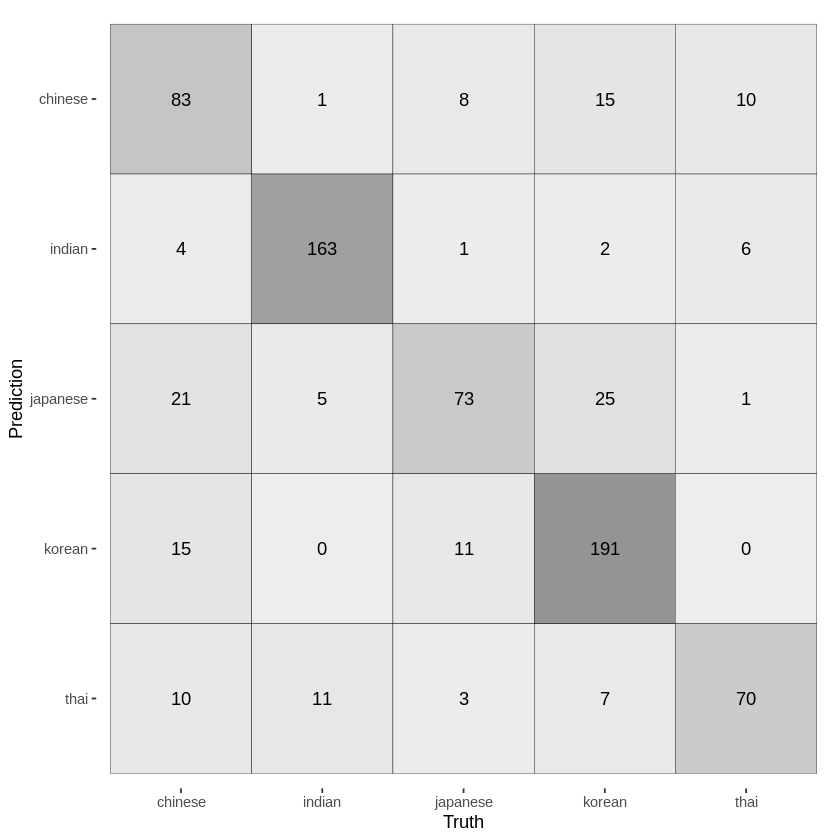

In [11]:
update_geom_defaults(geom = "tile", new = list(color = "black", alpha = 0.7))
# Visualize confusion matrix
results %>% 
  conf_mat(cuisine, .pred_class) %>% 
  autoplot(type = "heatmap")

Οι πιο σκοτεινές τετράγωνες περιοχές στο γράφημα του πίνακα σύγχυσης υποδεικνύουν υψηλό αριθμό περιπτώσεων, και ιδανικά μπορείτε να δείτε μια διαγώνια γραμμή από πιο σκοτεινά τετράγωνα που δείχνουν περιπτώσεις όπου η προβλεπόμενη και η πραγματική ετικέτα είναι ίδιες.

Ας υπολογίσουμε τώρα τα συνοπτικά στατιστικά για τον πίνακα σύγχυσης.


In [12]:
# Summary stats for confusion matrix
conf_mat(data = results, truth = cuisine, estimate = .pred_class) %>% 
summary()

.metric              .estimator .estimate
1  accuracy             multiclass 0.7880435
2  kap                  multiclass 0.7276583
3  sens                 macro      0.7780927
4  spec                 macro      0.9477598
5  ppv                  macro      0.7585583
6  npv                  macro      0.9460080
7  mcc                  multiclass 0.7292724
8  j_index              macro      0.7258524
9  bal_accuracy         macro      0.8629262
10 detection_prevalence macro      0.2000000
11 precision            macro      0.7585583
12 recall               macro      0.7780927
13 f_meas               macro      0.7641862

Αν επικεντρωθούμε σε ορισμένες μετρικές όπως η ακρίβεια, η ευαισθησία, το ppv, δεν είμαστε σε κακή θέση για αρχή 🥳!

## 4. Εμβαθύνοντας

Ας θέσουμε μια λεπτή ερώτηση: Ποια κριτήρια χρησιμοποιούνται για να επιλεγεί ένας συγκεκριμένος τύπος κουζίνας ως το προβλεπόμενο αποτέλεσμα;

Λοιπόν, οι στατιστικοί αλγόριθμοι μηχανικής μάθησης, όπως η λογιστική παλινδρόμηση, βασίζονται στην `πιθανότητα`. Αυτό που στην πραγματικότητα προβλέπει ένας ταξινομητής είναι μια κατανομή πιθανότητας πάνω σε ένα σύνολο πιθανών αποτελεσμάτων. Η κατηγορία με την υψηλότερη πιθανότητα επιλέγεται στη συνέχεια ως το πιο πιθανό αποτέλεσμα για τις δεδομένες παρατηρήσεις.

Ας το δούμε αυτό στην πράξη κάνοντας τόσο σκληρές προβλέψεις κατηγοριών όσο και πιθανότητες.


In [13]:
# Make hard class prediction and probabilities
results_prob <- cuisines_test %>%
  select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test)) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test, type = "prob"))

# Print out results
results_prob %>% 
  slice_head(n = 5)

cuisine .pred_class .pred_chinese .pred_indian .pred_japanese .pred_korean
1 indian  thai        1.551259e-03  0.4587877    5.988039e-04   2.428503e-04
2 indian  indian      2.637133e-05  0.9999488    6.648651e-07   2.259993e-05
3 indian  indian      1.049433e-03  0.9909982    1.060937e-03   1.644947e-05
4 indian  indian      6.237482e-02  0.4763035    9.136702e-02   3.660913e-01
5 indian  indian      1.431745e-02  0.9418551    2.945239e-02   8.721782e-03
  .pred_thai  
1 5.388194e-01
2 1.577948e-06
3 6.874989e-03
4 3.863391e-03
5 5.653283e-03

Πολύ καλύτερα!

✅ Μπορείς να εξηγήσεις γιατί το μοντέλο είναι αρκετά σίγουρο ότι η πρώτη παρατήρηση είναι Ταϊλανδέζικη;

## **🚀Πρόκληση**

Σε αυτό το μάθημα, χρησιμοποίησες τα καθαρισμένα δεδομένα σου για να δημιουργήσεις ένα μοντέλο μηχανικής μάθησης που μπορεί να προβλέψει μια εθνική κουζίνα βασισμένη σε μια σειρά από συστατικά. Αφιέρωσε λίγο χρόνο για να διαβάσεις τις [πολλές επιλογές](https://www.tidymodels.org/find/parsnip/#models) που προσφέρει το Tidymodels για την ταξινόμηση δεδομένων και [άλλους τρόπους](https://parsnip.tidymodels.org/articles/articles/Examples.html#multinom_reg-models) για να εφαρμόσεις πολυωνυμική παλινδρόμηση.

#### ΕΥΧΑΡΙΣΤΟΥΜΕ ΤΟΥΣ:

[`Allison Horst`](https://twitter.com/allison_horst/) για τη δημιουργία των καταπληκτικών εικονογραφήσεων που κάνουν τη R πιο φιλόξενη και ενδιαφέρουσα. Βρες περισσότερες εικονογραφήσεις στη [συλλογή](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM) της.

[Cassie Breviu](https://www.twitter.com/cassieview) και [Jen Looper](https://www.twitter.com/jenlooper) για τη δημιουργία της αρχικής έκδοσης αυτού του module σε Python ♥️

<br>
Θα έβαζα και μερικά αστεία, αλλά δεν καταλαβαίνω λογοπαίγνια με φαγητό 😅.

<br>

Καλή Μάθηση,

[Eric](https://twitter.com/ericntay), Χρυσός Πρεσβευτής Φοιτητών Microsoft Learn.



---

**Αποποίηση ευθύνης**:  
Αυτό το έγγραφο έχει μεταφραστεί χρησιμοποιώντας την υπηρεσία αυτόματης μετάφρασης [Co-op Translator](https://github.com/Azure/co-op-translator). Παρόλο που καταβάλλουμε προσπάθειες για ακρίβεια, παρακαλούμε να έχετε υπόψη ότι οι αυτόματες μεταφράσεις ενδέχεται να περιέχουν σφάλματα ή ανακρίβειες. Το πρωτότυπο έγγραφο στη μητρική του γλώσσα θα πρέπει να θεωρείται η αυθεντική πηγή. Για κρίσιμες πληροφορίες, συνιστάται επαγγελματική ανθρώπινη μετάφραση. Δεν φέρουμε ευθύνη για τυχόν παρεξηγήσεις ή εσφαλμένες ερμηνείες που προκύπτουν από τη χρήση αυτής της μετάφρασης.
